In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import PIL

In [2]:
img2 = r'D:\Remote_Sensing\Untitled Folder\tiff\tif2jpgB2.jpg'
img4 = r'D:\Remote_Sensing\Untitled Folder\tiff\tif2jpg.jpg'

In [3]:
test2 = PIL.Image.open(img2)
test4 = PIL.Image.open(img4)

In [1]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(test2)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(test4)

NameError: name 'plt' is not defined

In [5]:
pix2 = np.array(test2)
pix4 = np.array(test4)

In [7]:
pix2.shape

(1075, 1075)

In [7]:
pix4

array([[142, 158, 144, ..., 131, 134, 137],
       [ 98, 128, 127, ..., 135, 139, 144],
       [ 77, 108, 116, ..., 143, 145, 148],
       ...,
       [ 89,  90,  89, ...,  98, 117, 138],
       [ 89,  90,  90, ...,  79,  96, 111],
       [ 89,  91,  92, ...,  66,  78,  88]], dtype=uint8)

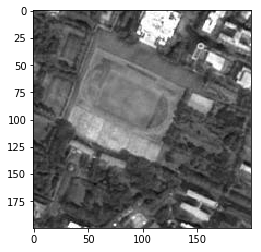

In [126]:
plt.imshow(pix2[200:400, 600:800], cmap=plt.cm.gray)

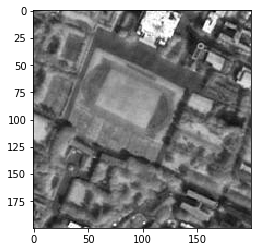

In [127]:
plt.imshow(pix4[200:400, 600:800], cmap=plt.cm.gray)

In [66]:
pix44 = np.array(pix4[200:400, 600:800])
pix44.shape

(200, 200)

In [21]:
pix22 = np.array(pix2[200:400, 600:800])
pix22

array([[ 79,  83,  87, ..., 102,  82,  88],
       [101,  96,  91, ..., 171, 177, 192],
       [101,  97,  94, ..., 218, 246, 255],
       ...,
       [ 89,  93, 105, ..., 124, 121, 115],
       [122, 113, 112, ..., 115, 121, 132],
       [116, 105, 108, ..., 103, 113, 132]], dtype=uint8)

In [22]:
flatten2 = pix22.flatten()
flatten4 = pix44.flatten()

In [23]:
flatten4

array([ 75,  86,  97, ..., 103, 105, 113], dtype=uint8)

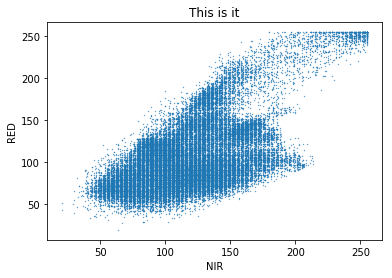

In [28]:
x = flatten4
y = flatten2

plt.title("This is it")
plt.xlabel("NIR")
plt.ylabel("RED")
plt.scatter(x, y , s=0.1)

In [50]:
LL = list(zip(x,y))

In [54]:
LL = np.array(LL)
LL

array([[ 75,  79],
       [ 86,  83],
       [ 97,  87],
       ...,
       [103, 103],
       [105, 113],
       [113, 132]], dtype=uint8)

In [55]:
from sklearn.cluster import KMeans

In [102]:
clf = KMeans(n_clusters=5)

In [103]:
clf.fit(LL)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [104]:
clf.labels_

array([4, 4, 4, ..., 0, 0, 0])

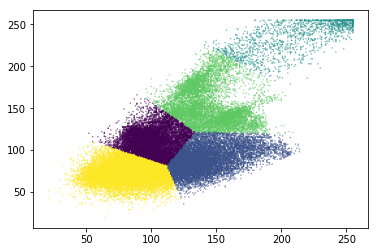

In [105]:
plt.scatter(LL[:,0],LL[:,1] , c=clf.labels_, s=0.1)

In [106]:
X = LL[:,0]
Y = LL[:,1]
Z = clf.labels_
Z

array([4, 4, 4, ..., 0, 0, 0])

In [107]:
kernel = np.ones((200,200), np.uint8)
kernel

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [108]:
Xr = X.reshape((200,200))
Yr = Y.reshape((200,200))
Zr = Z.reshape((200,200))
Zr

array([[4, 4, 4, ..., 4, 4, 4],
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [3, 1, 1, ..., 0, 0, 3],
       [0, 0, 1, ..., 0, 0, 0]])

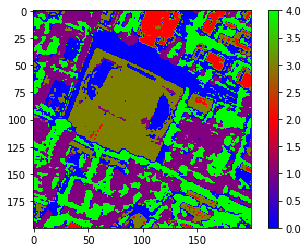

In [113]:
Classified = plt.imshow(Zr, cmap='brg')
plt.colorbar()

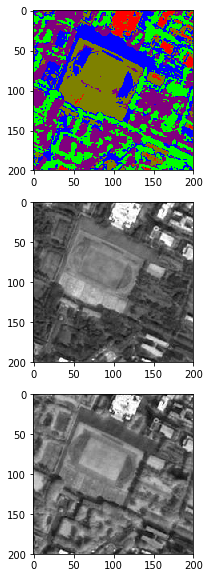

In [174]:
fig =  plt.figure(figsize=(100,10))


ax1 = fig.add_subplot(3,1,1)
ax1.imshow(Zr, cmap='brg')
ax2 = fig.add_subplot(3,1,2)
ax2.imshow(pix2[200:400, 600:800], cmap=plt.cm.gray)
ax3 = fig.add_subplot(3,1,3)
ax3.imshow(pix4[200:400, 600:800], cmap=plt.cm.gray)